In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTEENN

In [2]:
data=pd.read_csv('Employee-turnover.csv')
data.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


In [3]:
data.isnull().sum()

Employee Count                0
Employee ID                   0
Department                    0
Job Role                      0
Gender                        0
Age                           0
Marital Status                0
Education                     0
Education Field               0
Business Travel               0
Distance From Home (kms)      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income (USD)          0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
No. of Companies Worked       0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Training Times Last Year      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
dtype: int64

In [4]:
duplicate = data[data.duplicated()]
duplicate

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)


In [5]:
data.rename(columns = {'Attrition (Yes/No)' : 'Attrition'}, inplace = True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Attrition=le.fit_transform(data.Attrition)
data.Attrition

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [7]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [8]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Employee Count              1470 non-null   int64 
 1   Employee ID                 1470 non-null   int64 
 2   Department                  1470 non-null   object
 3   Job Role                    1470 non-null   object
 4   Gender                      1470 non-null   object
 5   Age                         1470 non-null   int64 
 6   Marital Status              1470 non-null   object
 7   Education                   1470 non-null   object
 8   Education Field             1470 non-null   object
 9   Business Travel             1470 non-null   object
 10  Distance From Home (kms)    1470 non-null   int64 
 11  Job Involvement             1470 non-null   object
 12  Job Level                   1470 non-null   int64 
 13  Job Satisfaction            1470 non-null   obje

In [10]:
data=data.drop(labels=['Employee Count','Employee ID'],axis=1)

In [11]:
data.describe()

,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.063946,6502.931293,14.951701,0.793878,2.689116,11.279592,7.008163,4.229252,2.187755,4.123129,2.799320,0.161224
std,9.135373,8.106864,1.106940,4707.956783,3.533904,0.852077,2.494231,7.780782,6.126525,3.623137,3.222430,3.568136,1.289271,0.367863
min,18.000000,1.000000,1.000000,1009.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.000000,2911.000000,12.000000,0.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,36.000000,7.000000,2.000000,4919.000000,14.000000,1.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000,3.000000,0.000000
75%,43.000000,14.000000,3.000000,8379.000000,17.000000,1.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000,3.000000,0.000000
max,60.000000,29.000000,5.000000,19999.000000,25.000000,3.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000,6.000000,1.000000


The people working in my organization ranges from 18-60 years of age with average age being of 36 years.

# Univariate Analysis

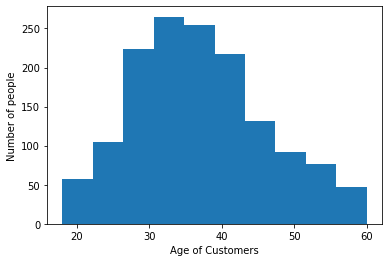

In [12]:
plt.hist(data['Age'])
plt.xlabel('Age of Customers')
plt.ylabel('Number of people')
plt.show()

In [13]:
data['age_bins'] = pd.cut(x=data.Age, bins=[10,20,30,40,50,60])
data['age_bins'].value_counts()

(30, 40]    619
(20, 30]    358
(40, 50]    322
(50, 60]    143
(10, 20]     28
Name: age_bins, dtype: int64

Most of the people working in the organization has age in the range of 30-40

In [14]:
data[['age_bins','Attrition']].groupby(['age_bins']).agg(['mean','count'])

Attrition      
              mean count
age_bins                
(10, 20]  0.571429    28
(20, 30]  0.234637   358
(30, 40]  0.137318   619
(40, 50]  0.105590   322
(50, 60]  0.125874   143

The age group 10-20 has the largest churn rate.

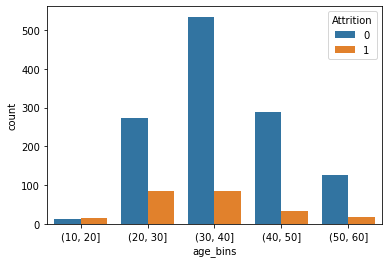

In [15]:
sns.countplot(x=data['age_bins'],data=data,hue='Attrition')

From the above dataset we can see that the churn rate is more in the younger group of people from 18-30 years

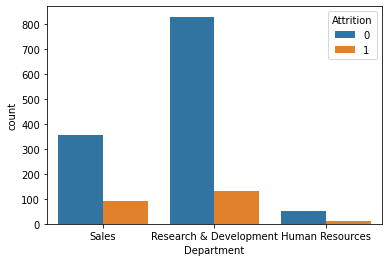

In [16]:
sns.countplot(x=data['Department'],data=data,hue='Attrition')

In [17]:
data[['Department','Attrition']].groupby(['Department']).agg(['mean','count'])

Attrition      
                            mean count
Department                            
Human Resources         0.190476    63
Research & Development  0.138398   961
Sales                   0.206278   446

In [18]:
data[['Department','Salary Hike (%)']].groupby(['Department']).agg(['mean'])

,Salary Hike (%)
,mean
Department,
Human Resources,14.603175
Research & Development,15.007284
Sales,14.881166


From the above datasets we can conclude that the churn rate is least in Research & Development department and that can be explained by the Salary hike as it is greatest in this department.


In [19]:
data[['Total Working Years','Attrition']].groupby('Attrition').agg('mean')

,Total Working Years
Attrition,
0,11.862936
1,8.244726


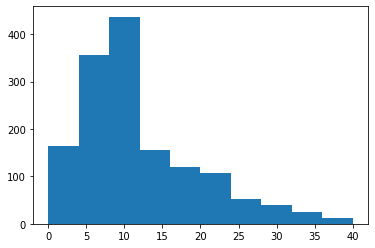

In [20]:
plt.hist(data['Total Working Years'])
plt.show()

As the number of working years in the organization increases the churn rate decreases

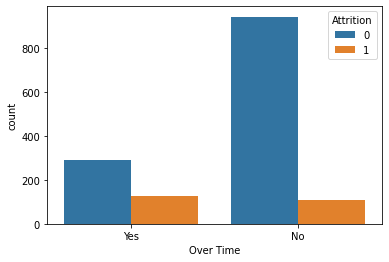

In [21]:
sns.countplot(x=data['Over Time'],data=data,hue='Attrition')

In [22]:
data[['Over Time','Attrition']].groupby(['Over Time']).agg(['mean','count'])

Attrition      
               mean count
Over Time                
No         0.104364  1054
Yes        0.305288   416

From the above dataset we can say that the people given over time has more churn rate.

# Bivariate Analysis

In [23]:
data_target0=data.loc[data["Attrition"]==0]
data_target1=data.loc[data["Attrition"]==1]
# We will take the dataset having churn value because thats what we need to focus on

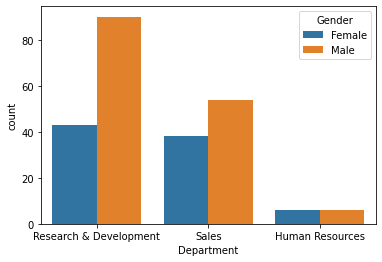

In [24]:
sns.countplot(data = data_target1, x= 'Department', order=data_target1['Department'].value_counts().index,hue = 'Gender') 

In [25]:
data_target1[['Department','Gender','Attrition']].groupby(['Department','Gender']).agg(['mean','count'])

Attrition      
                                   mean count
Department             Gender                
Human Resources        Female       1.0     6
                       Male         1.0     6
Research & Development Female       1.0    43
                       Male         1.0    90
Sales                  Female       1.0    38
                       Male         1.0    54

From the above datasets we can see that in both R&D and Sales department the churn rate of males is more than females.

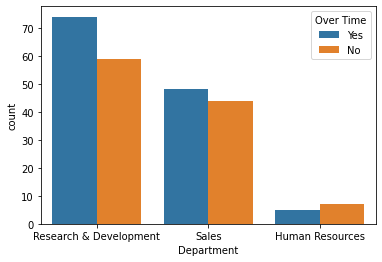

In [26]:
sns.countplot(data = data_target1, x= 'Department', order=data_target1['Department'].value_counts().index,hue = 'Over Time') 

In [27]:
data_target1[['Department','Over Time','Attrition']].groupby(['Department','Over Time']).agg(['mean','count'])

Attrition      
                                      mean count
Department             Over Time                
Human Resources        No              1.0     7
                       Yes             1.0     5
Research & Development No              1.0    59
                       Yes             1.0    74
Sales                  No              1.0    44
                       Yes             1.0    48

From the above datasets we can conclude that the people given over time in R&D and Sales department churn more.However in Human Resource department we see that the people not given overtime are more churners than the ones given.

# Model building

In [28]:
data=pd.get_dummies(data,drop_first=True)

In [29]:
data.Attrition.value_counts(normalize=True)
#It is an imbalanced dataset

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [30]:
corr=data.corr()
corr

,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,...,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,"age_bins_(20, 30]","age_bins_(30, 40]","age_bins_(40, 50]","age_bins_(50, 60]"
Age,1.000000,-0.001686,0.509604,0.497855,0.040287,0.037510,0.299358,0.680381,0.311309,0.212901,...,0.019036,0.012820,0.023116,-0.045414,-0.035964,0.053585,-0.619877,-0.157940,0.466384,0.635444
Distance From Home (kms),-0.001686,1.000000,0.005303,-0.017014,0.015960,0.044872,-0.027640,0.004628,0.009508,0.018845,...,-0.043870,-0.001836,0.011008,-0.009816,0.050375,-0.027317,0.027004,-0.027061,0.020703,-0.012897
Job Level,0.509604,0.005303,1.000000,0.950300,0.010361,0.013984,0.142812,0.782208,0.534739,0.389447,...,0.052811,0.052688,-0.001173,-0.036409,-0.020634,0.034479,-0.319246,-0.096600,0.287477,0.283912
Monthly Income (USD),0.497855,-0.017014,0.950300,1.000000,0.015050,0.005408,0.149919,0.772893,0.514285,0.363818,...,0.049034,0.041436,-0.002185,-0.043522,-0.011957,0.025381,-0.301134,-0.114912,0.289283,0.284021
Salary Hike (%),0.040287,0.015960,0.010361,0.015050,1.000000,0.041906,-0.000315,0.019554,-0.002812,0.031862,...,-0.021975,0.089025,-0.027158,-0.033720,-0.000536,0.035439,-0.003459,-0.012131,0.006775,0.034380
Stock Option Level,0.037510,0.044872,0.013984,0.005408,0.041906,1.000000,0.031647,0.010136,0.015058,0.050818,...,0.008962,0.030586,0.040279,-0.003166,-0.000752,-0.030796,0.029384,0.010659,0.012303,-0.017584
No. of Companies Worked,0.299358,-0.027640,0.142812,0.149919,-0.000315,0.031647,1.000000,0.238689,-0.118331,-0.090788,...,0.023893,-0.040693,-0.001285,-0.026004,0.008499,-0.000612,-0.183514,-0.034019,0.149809,0.157856
Total Working Years,0.680381,0.004628,0.782208,0.772893,0.019554,0.010136,0.238689,1.000000,0.628133,0.460365,...,0.024502,0.029186,0.027280,-0.046538,-0.025356,0.032959,-0.396343,-0.133929,0.324372,0.430313
Years At Company,0.311309,0.009508,0.534739,0.514285,-0.002812,0.015058,-0.118331,0.628133,1.000000,0.758754,...,0.021339,0.039655,0.006899,-0.014616,-0.038598,0.053230,-0.212701,-0.003611,0.166604,0.146120
Years In Current Role,0.212901,0.018845,0.389447,0.363818,0.031862,0.050818,-0.090788,0.460365,0.758754,1.000000,...,0.030049,0.066943,-0.025442,0.002957,-0.023997,0.039459,-0.169817,0.055956,0.097717,0.083167


In [31]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
upper
# Converting it into an upper triangular matrix so that it is faster and easier to loop through

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,...,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,"age_bins_(20, 30]","age_bins_(30, 40]","age_bins_(40, 50]","age_bins_(50, 60]"
Age,NaN,-0.001686,0.509604,0.497855,0.040287,0.037510,0.299358,0.680381,0.311309,0.212901,...,0.019036,0.012820,0.023116,-0.045414,-0.035964,0.053585,-0.619877,-0.157940,0.466384,0.635444
Distance From Home (kms),NaN,NaN,0.005303,-0.017014,0.015960,0.044872,-0.027640,0.004628,0.009508,0.018845,...,-0.043870,-0.001836,0.011008,-0.009816,0.050375,-0.027317,0.027004,-0.027061,0.020703,-0.012897
Job Level,NaN,NaN,NaN,0.950300,0.010361,0.013984,0.142812,0.782208,0.534739,0.389447,...,0.052811,0.052688,-0.001173,-0.036409,-0.020634,0.034479,-0.319246,-0.096600,0.287477,0.283912
Monthly Income (USD),NaN,NaN,NaN,NaN,0.015050,0.005408,0.149919,0.772893,0.514285,0.363818,...,0.049034,0.041436,-0.002185,-0.043522,-0.011957,0.025381,-0.301134,-0.114912,0.289283,0.284021
Salary Hike (%),NaN,NaN,NaN,NaN,NaN,0.041906,-0.000315,0.019554,-0.002812,0.031862,...,-0.021975,0.089025,-0.027158,-0.033720,-0.000536,0.035439,-0.003459,-0.012131,0.006775,0.034380
Stock Option Level,NaN,NaN,NaN,NaN,NaN,NaN,0.031647,0.010136,0.015058,0.050818,...,0.008962,0.030586,0.040279,-0.003166,-0.000752,-0.030796,0.029384,0.010659,0.012303,-0.017584
No. of Companies Worked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238689,-0.118331,-0.090788,...,0.023893,-0.040693,-0.001285,-0.026004,0.008499,-0.000612,-0.183514,-0.034019,0.149809,0.157856
Total Working Years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628133,0.460365,...,0.024502,0.029186,0.027280,-0.046538,-0.025356,0.032959,-0.396343,-0.133929,0.324372,0.430313
Years At Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.758754,...,0.021339,0.039655,0.006899,-0.014616,-0.038598,0.053230,-0.212701,-0.003611,0.166604,0.146120
Years In Current Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.030049,0.066943,-0.025442,0.002957,-0.023997,0.039459,-0.169817,0.055956,0.097717,0.083167


In [32]:
columns_to_drop = []
for cols in upper.columns:
    if any (upper[cols] > 0.75):
        columns_to_drop.append(cols)
columns_to_drop
# Selecting all columns and creating a list where correlation factor > 0.75 which shows that columns are highly correlated and hence we dont require them

['Monthly Income (USD)',
 'Total Working Years',
 'Years In Current Role',
 'Years With Curr Manager',
 'Job Role_Sales Executive']

In [33]:
columns_to_drop.append('Age')
# Because we have already created bins for this column

In [34]:
columns_to_drop

['Monthly Income (USD)',
 'Total Working Years',
 'Years In Current Role',
 'Years With Curr Manager',
 'Job Role_Sales Executive',
 'Age']

In [35]:
data=data.drop(columns_to_drop,axis=1)

In [36]:
X=data.drop(labels=['Attrition'],axis=1)
y=data.Attrition

In [37]:
sm=SMOTEENN(random_state=42)

In [38]:
X_res,y_res=sm.fit_resample(X,y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       134
           1       0.95      0.92      0.93       234

    accuracy                           0.92       368
   macro avg       0.91      0.92      0.91       368
weighted avg       0.92      0.92      0.92       368



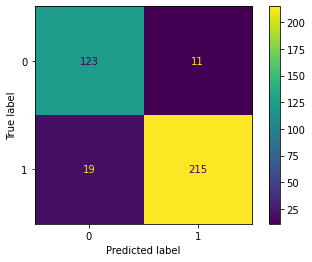

In [40]:
cm=confusion_matrix(y_test,y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [41]:
lr=LogisticRegression(random_state=42,solver='liblinear')
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       134
           1       0.98      0.94      0.96       234

    accuracy                           0.95       368
   macro avg       0.94      0.95      0.95       368
weighted avg       0.95      0.95      0.95       368



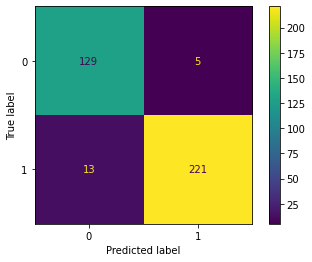

In [42]:
cm=confusion_matrix(y_test,y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [43]:
s=StandardScaler()
X_train_s=s.fit_transform(X_train)
X_test_s=s.transform(X_test)

In [44]:
svm_s=SVC(random_state=42)
svm_s.fit(X_train_s,y_train)
y_pred_svm_s=svm_s.predict(X_test_s)
print(classification_report(y_test,y_pred_svm_s))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       134
           1       0.99      0.94      0.96       234

    accuracy                           0.96       368
   macro avg       0.95      0.96      0.95       368
weighted avg       0.96      0.96      0.96       368



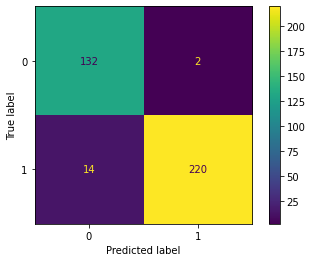

In [45]:
cm=confusion_matrix(y_test,y_pred_svm_s)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [46]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       134
           1       0.99      0.95      0.97       234

    accuracy                           0.96       368
   macro avg       0.95      0.97      0.96       368
weighted avg       0.96      0.96      0.96       368



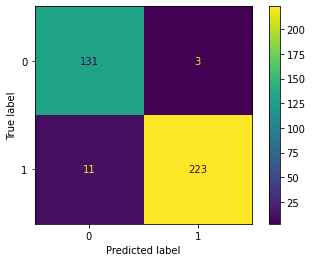

In [47]:
cm=confusion_matrix(y_test,y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [48]:
# To select the best value of K
error=[]
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_s,y_train)
  y_pred_knn=knn.predict(X_test_s)
  error.append((i,1-accuracy_score(y_test,y_pred_knn)))

error_df=pd.DataFrame(error,columns=['K','Error'])
error_df

,K,Error
0,1,0.097826
1,2,0.062500
2,3,0.100543
3,4,0.084239
4,5,0.108696
5,6,0.089674
6,7,0.122283
7,8,0.122283
8,9,0.138587
9,10,0.135870


Text(0.5, 1.0, 'KNN Elbow Curve')

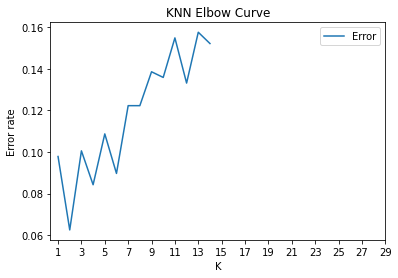

In [49]:
ax = error_df.set_index('K').plot()
ax.set(xlabel='K', ylabel='Error rate')
ax.set_xticks(range(1, 30, 2));
plt.title('KNN Elbow Curve')

In [50]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_s,y_train)
y_pred_knn=knn.predict(X_test_s)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       134
           1       0.95      0.95      0.95       234

    accuracy                           0.94       368
   macro avg       0.93      0.93      0.93       368
weighted avg       0.94      0.94      0.94       368



Conclusion: Random Forest model is best suitable for this dataset since the values of precision,recall and f1 score for class 0 and 1  along with accuracy is better than the other models.